### Air

At 50 C, the saturation pressure of water is 12.3 kPa. For pressure values less than this, water vapor can be treated as an ideal gas with less than 0.2 % error. 

That is, atmospheric air can be treated as an ideal-gas mixture whose pressure is the sum of the partial pressure of dry air, $p_\text{a}$ and that of water vapor, $p_\text{v}$:

$$p = p_\text{a} + p_\text{v}$$



### Humidity

Absolute humidity is defined as:

$$ \omega = \frac{m_\text{v}}{m_\text{a}}$$

which is the ratio of the mass of water vapor to air. 

The relative humidity is defined as the ratio of the partial pressure of water vapor to the saturation vapor pressure:

$$\phi = \frac{p_\text{v}}{p_\text{v}(T=T_\text{sat})}$$

The total enthalpy of atmospheric air is then:

$$H = H_\text{a} + H_\text{v} $$

### Determining property values

Similar to IAPWS, we can use a package called "pyfluids" to define the class for a given state, which can give us every property we need.

Here are the classes:
- Fluid class - an implementation of pure fluids and binary mixtures.
- Mixture class - an implementation of mixtures with pure fluids components.
- FluidsList enum - the list of all available fluids.
- Input class - the inputs for the Fluid and Mixture classes.
- HumidAir class - an implementation of real humid air.
- InputHumidAir class - the inputs for the HumidAir class.

The units are in SI unless otherwise stated:
- temperature unit - degree Celsius (°C);
- decimal fraction unit - percent (%, from 0 to 100).

We will use HumidAir and InputHumidAir:

In [2]:
try:
    from pyfluids import HumidAir, InputHumidAir
except ImportError:
    !pip install pyfluids
    from pyfluids import HumidAir, InputHumidAir

In [3]:
# Define your properties. 
pAir_Pa = 101325 # Pa
Tair_C = 21 # deg C
RH = 50 # 0 to 100, relative humidity
# Twb_C = 15

Here is our class that we will define, which requires three properties instead of two as it was in IAPWS:

In [4]:
humid_air = HumidAir().with_state(
    InputHumidAir.pressure(pAir_Pa),
    InputHumidAir.temperature(Tair_C),
    InputHumidAir.relative_humidity(RH),
    #InputHumidAir.wet_bulb_temperature(Twb_C),
)

We can get a property from that state by using the "dot" notation. 

Here's a list of the other properties you can get using "HumidAir":
- compressibility - compressibility factor (dimensionless).
- conductivity - thermal conductivity (W/m/K).
- density - mass density per humid air unit (kg/m3).
- dew_temperature - dew-point temperature (by default, °C; see how to change it).
- dynamic_viscosity - dynamic viscosity (Pa*s).
- enthalpy - mass specific enthalpy per humid air (J/kg).
- entropy - mass specific entropy per humid air (J/kg/K).
- humidity - absolute humidity ratio (kg/kg d.a.).
- kinematic_viscosity - kinematic viscosity (m2/s).
- partial_pressure - partial pressure of water vapor (Pa).
- prandtl - Prandtl number (dimensionless).
- pressure - absolute pressure (Pa).
- relative_humidity - relative humidity ratio (by default, %; see how to change it).
- specific_heat - mass specific constant pressure specific heat per humid air (J/kg/K).
- specific_volume - mass specific volume per humid air unit (m3/kg).
- temperature - dry-bulb temperature (by default, °C; see how to change it).
- wet_bulb_temperature - wet-bulb temperature (by default, °C; see how to change it).
- units_system - configured units system (enum).

We would like to determine the: 
- (a) specific (absolute) humidity,
- (b) enthalpy (in kJ/kg dry air),
- (c) relative humidity,
- (d) the dew-point temperature, and
- (e) the specific volume of the air, in m$^3$/kg dry air.

In [5]:
enthalpy_JperKg = humid_air.enthalpy
RH = humid_air.relative_humidity
Tdew_C = humid_air.dew_temperature
v_m3perkg = humid_air.specific_volume

print('(a) Absolute (specific) humidity: {0:1.5f} kg/kg.'.format(humid_air.humidity))
print('(b) Enthalpy: {0:1.1f} J/kg.'.format(enthalpy_JperKg))
print('(c) Relative humidity: {0:1.1f} %.'.format(RH))
print('(d) Dew-point temperature: {0:1.1f} deg C.'.format(Tdew_C))
print('(e) Specific volume: {0:1.3f} m3/kg.'.format(v_m3perkg))

(a) Absolute (specific) humidity: 0.00776 kg/kg.
(b) Enthalpy: 40521.6 J/kg.
(c) Relative humidity: 50.0 %.
(d) Dew-point temperature: 10.2 deg C.
(e) Specific volume: 0.837 m3/kg.


### Psychrometric chart

In [6]:
import matplotlib.pyplot as plt
import numpy as np

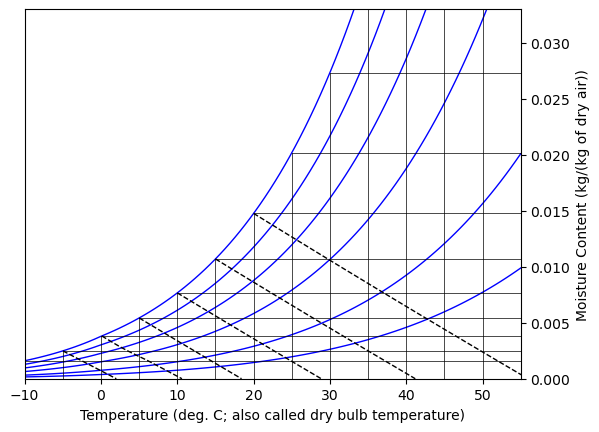

In [7]:
# Constants

linewidth = 1

pAir_Pa = 101325

plt.figure()
plt.clf()
Tair_C_ = np.linspace(-10, 55, 100) # range of temperatures
for RH_ in [10,20,40,60,80,100]:
    humid_air_1 = [HumidAir().with_state(
    InputHumidAir.pressure(pAir_Pa),
    InputHumidAir.temperature(t),
    InputHumidAir.relative_humidity(RH_),
    #InputHumidAir.wet_bulb_temperature(Twb_C),
    ) for t in Tair_C_]
    w = [s.humidity for s in humid_air_1]
    plt.plot(Tair_C_, w, 'b-',lw=linewidth)

for Twb_C_ in [-5,0.1,5,10,15,20]:
    humid_air_2 = HumidAir().with_state(
    InputHumidAir.pressure(pAir_Pa),
    #InputHumidAir.temperature(t),
    InputHumidAir.relative_humidity(0),
    InputHumidAir.wet_bulb_temperature(Twb_C_),
    )

    humid_air_3 = HumidAir().with_state(
    InputHumidAir.pressure(pAir_Pa),
    #InputHumidAir.temperature(t),
    InputHumidAir.relative_humidity(100),
    InputHumidAir.wet_bulb_temperature(Twb_C_),
    )

    Tair_C__ = np.linspace(humid_air_3.temperature, humid_air_2.temperature, 10) # range of temperatures
    
    humid_air_2 = [HumidAir().with_state(
    InputHumidAir.pressure(pAir_Pa),
    InputHumidAir.temperature(t),
    #InputHumidAir.relative_humidity(RH_),
    InputHumidAir.wet_bulb_temperature(Twb_C_),
    ) for t in Tair_C__]
    w = [s.humidity for s in humid_air_2]
    plt.plot(Tair_C__, w, 'k--',lw=linewidth)

for Tair_C___ in [-10,-5,0,5,10,15,20,25,30,35,40,45,50,55]:
    humid_air_5 = HumidAir().with_state(
    InputHumidAir.pressure(pAir_Pa),
    InputHumidAir.temperature(Tair_C___),
    InputHumidAir.relative_humidity(100),
    #InputHumidAir.wet_bulb_temperature(Twb_C_),
    )
    plt.plot([Tair_C___,Tair_C___], [0,humid_air_5.humidity], 'k-',lw=0.5)
    plt.plot([humid_air_5.temperature,60], [humid_air_5.humidity,humid_air_5.humidity], 'k-',lw=0.5)

plt.xlabel('Temperature (deg. C; also called dry bulb temperature)')
plt.ylabel('Moisture Content (kg/(kg of dry air))')

ax = plt.gca()
ax.set_xlim([-10, 55])
ax.set_ylim([0, 0.033])

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.savefig('psychrometric-chart.png')

### Dew point

In [8]:
try:
    from iapws import IAPWS97
except ImportError:
    !pip install iapws
    from iapws import IAPWS97

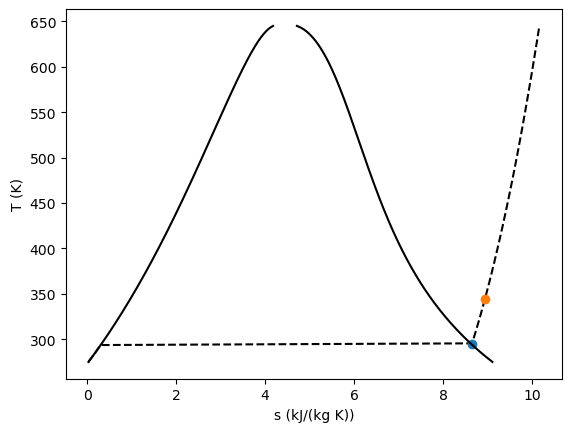

In [12]:
linewidth = 2
pressure = 25/1000/10

plt.figure()
plt.clf()
T = np.linspace(275, 372+273, 200) # range of temperatures
for P in [pressure]: #MPa
    steam = [IAPWS97(T=t, P=P) for t in T]
    S = [s.s for s in steam]
    plt.plot(S, T, 'k--')

# saturated vapor and liquid entropy lines
svap = [s.s for s in [IAPWS97(T=t, x=1) for t in T]]
sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T]]

state1 = IAPWS97(P=pressure,x=1)

T2 = state1.T+50
state2 = IAPWS97(P=pressure,T=T2)
h2 = state2.h

plt.plot(state1.s,state1.T,'o')
plt.plot(state2.s,T2,'o')

plt.plot(svap, T, 'k-')
plt.plot(sliq, T, 'k-')

plt.xlabel('s (kJ/(kg K))')
plt.ylabel('T (K)')

plt.savefig('dew-point.png')

### Adiabatic saturation temperature (aka wet bulb temperature)


Consider a control volume where: 
- undersaturated air at temperature $T_1$ and humidity $\omega_1$ enters.
- saturated air ($\phi = 100$%) exits at temperature $T_2$ and huidity $\omega_2$ 
- liquid water enters at temperature $T_2$

Assume:
- mass flow rate of dry air is constant
- mass flow rate of vapor in air increases by an amount equal to the rate of evaporation

$$\dot{m}_\text{evaporation} =  \dot{m}_\text{a}\left(\omega_2-\omega_1\right)$$

$$\dot{E}_\text{in} = \dot{E}_\text{out} $$

Since there is no work or heat transfer into the control volume, we have:

$$\dot{m}_\text{a}h_1 + \dot{m}_\text{evaporation} h_\text{f,2} = \dot{m}_\text{a} h_2 $$

or

$$\dot{m}_\text{a}h_1 + \dot{m}_\text{a} (\omega_2 - \omega_1) h_\text{f,2} = \dot{m}_\text{a} h_2 $$

$$\implies h_1 + (\omega_2 - \omega_1) h_\text{f,2} = h_2 $$

In [14]:
print(state3.T)

None
